<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

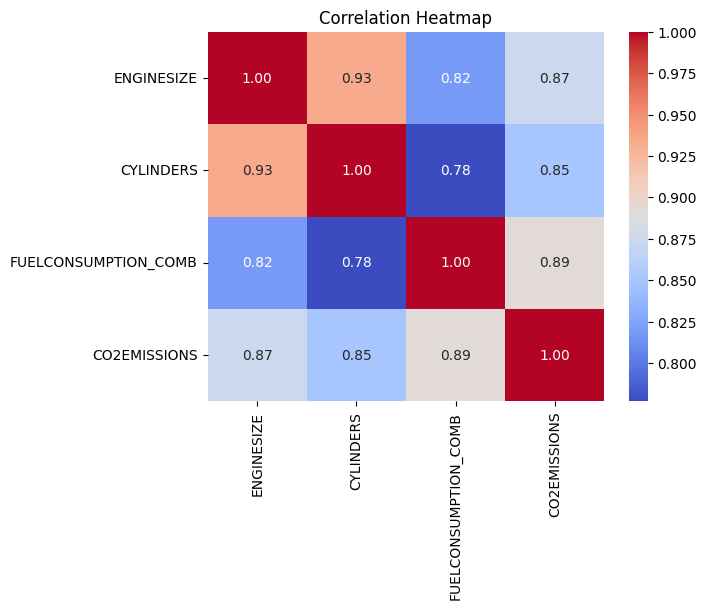

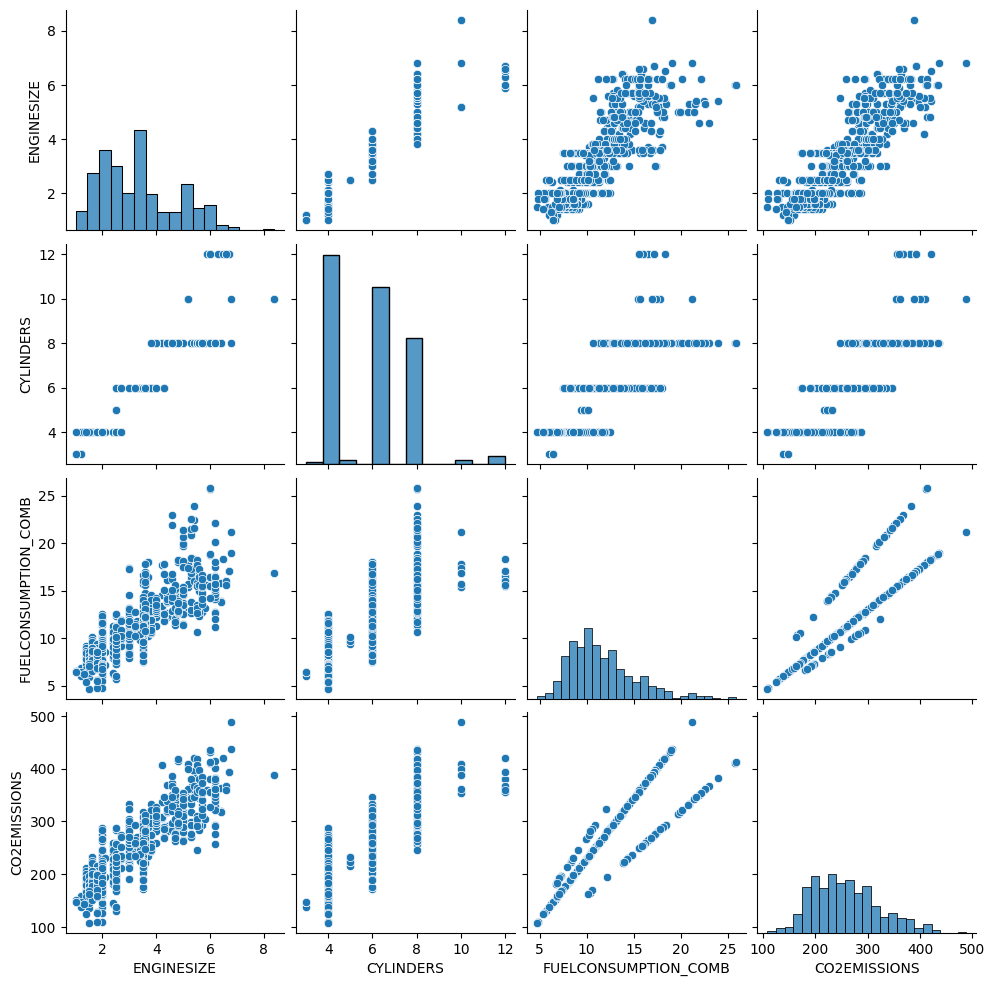

Linear Regression - MAE: 16.722, RSS: 109750.999, R²: 0.876
Decision Tree Regressor - MAE: 3.401, RSS: 43844.361, R²: 0.950
Random Forest Regressor - MAE: 4.390, RSS: 32776.233, R²: 0.963


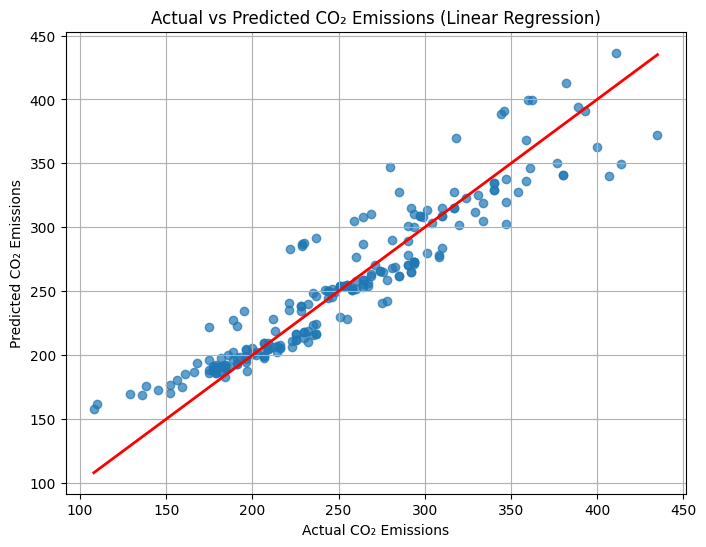

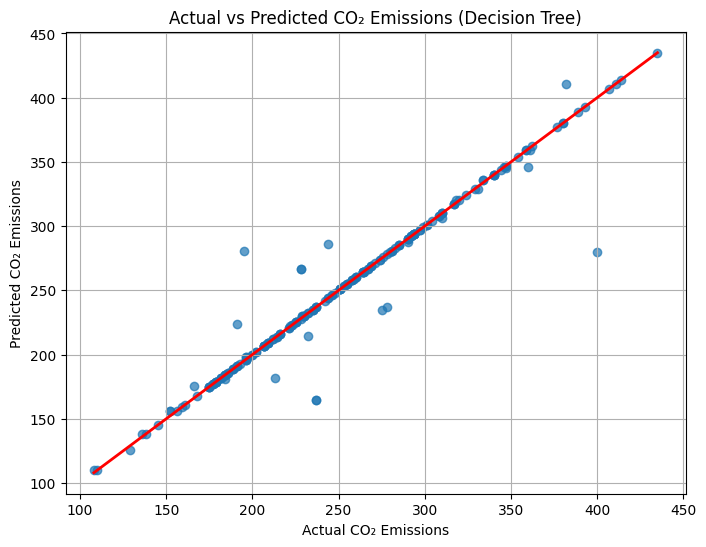

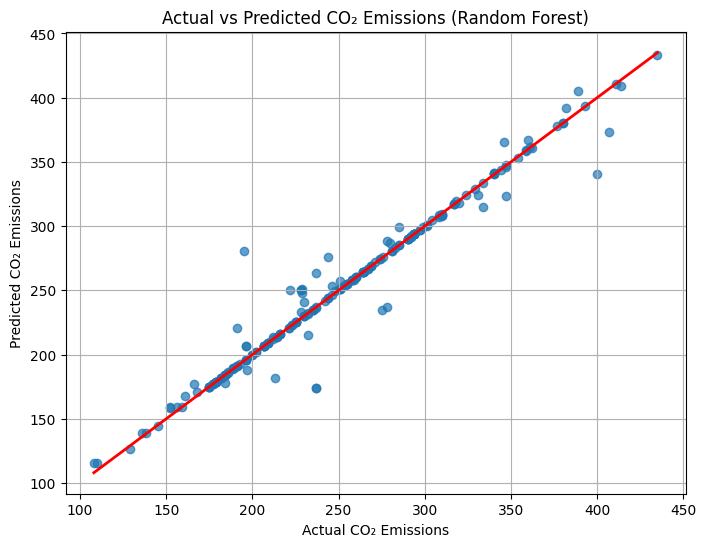

<ipython-input-13-f7939599a565>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y=metric, palette="viridis")


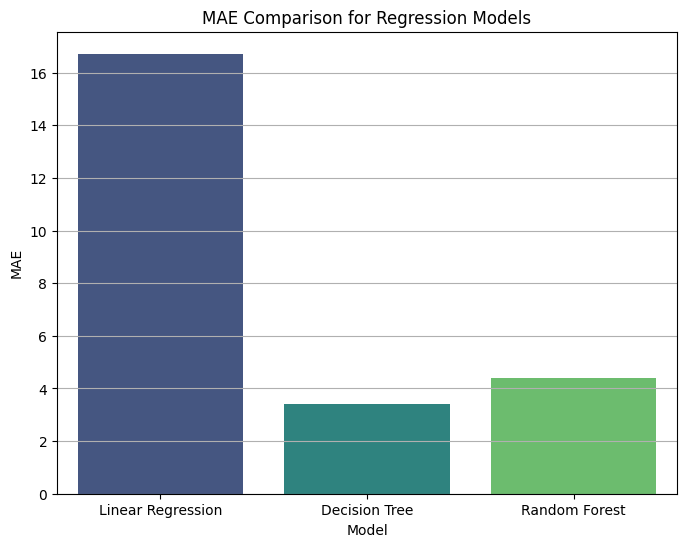

<ipython-input-13-f7939599a565>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y=metric, palette="viridis")


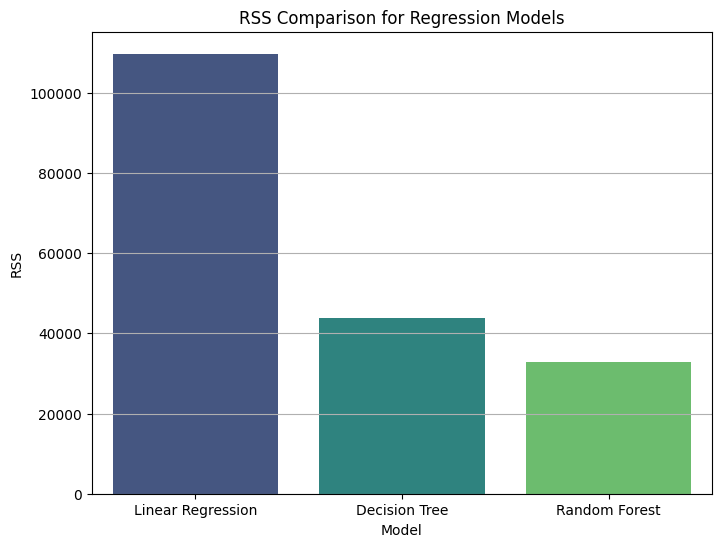

<ipython-input-13-f7939599a565>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y=metric, palette="viridis")


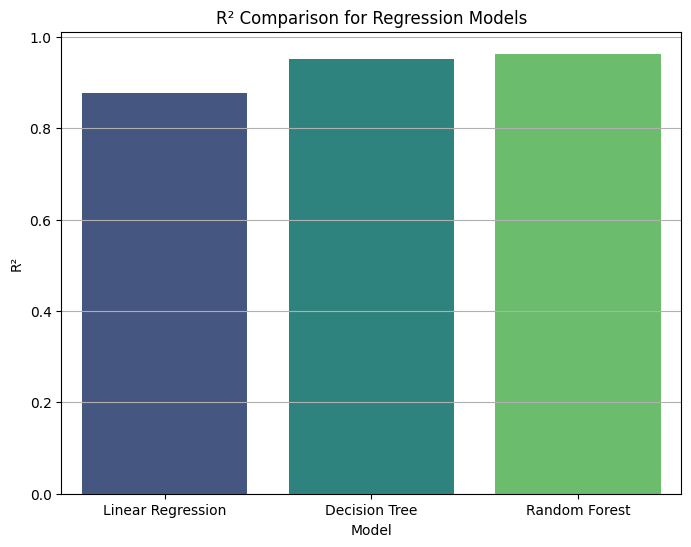

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('/content/FuelConsumption.csv')  # Adjust path if necessary

# Step 2: Data Exploration and Cleaning
# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

# Replace missing values only in numeric columns with their respective medians
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Remove rows with out-of-range data
df = df[(df['ENGINESIZE'] > 0) & (df['CYLINDERS'] > 0) & (df['FUELCONSUMPTION_COMB'] > 0)]

# Step 3: Exploratory Data Analysis (EDA)
# Correlation Heatmap
correlation_matrix = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']])
plt.show()

# Step 4: Feature Selection and Target Variable
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]  # Features
y = df['CO2EMISSIONS']  # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Regression Models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Step 8: Model Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rss = np.sum((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return mae, rss, r2

# Evaluate each model
lr_metrics = evaluate_model(y_test, lr_predictions)
dt_metrics = evaluate_model(y_test, dt_predictions)
rf_metrics = evaluate_model(y_test, rf_predictions)

# Print evaluation results
print("Linear Regression - MAE: {:.3f}, RSS: {:.3f}, R²: {:.3f}".format(*lr_metrics))
print("Decision Tree Regressor - MAE: {:.3f}, RSS: {:.3f}, R²: {:.3f}".format(*dt_metrics))
print("Random Forest Regressor - MAE: {:.3f}, RSS: {:.3f}, R²: {:.3f}".format(*rf_metrics))

# Step 9: Visualize Actual vs Predicted for All Models
models = {
    "Linear Regression": lr_predictions,
    "Decision Tree": dt_predictions,
    "Random Forest": rf_predictions
}

for model_name, predictions in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f"Actual vs Predicted CO₂ Emissions ({model_name})")
    plt.xlabel("Actual CO₂ Emissions")
    plt.ylabel("Predicted CO₂ Emissions")
    plt.grid(True)
    plt.show()

# Step 10: Compare Models Using a Bar Chart
# Collect metrics
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [lr_metrics[0], dt_metrics[0], rf_metrics[0]],
    "RSS": [lr_metrics[1], dt_metrics[1], rf_metrics[1]],
    "R²": [lr_metrics[2], dt_metrics[2], rf_metrics[2]],
})

# Plot MAE, RSS, and R² scores
metrics = ["MAE", "RSS", "R²"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=comparison_df, x="Model", y=metric, palette="viridis")
    plt.title(f"{metric} Comparison for Regression Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.grid(axis='y')
    plt.show()



In [ ]:
# Step 1: Handle missing data
# Apply fillna only to numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Step 2: Remove out-of-range or erroneous data (if any)
# Assuming realistic ranges for CO2 emissions and other features
df = df[(df['CO2EMISSIONS'] > 0) & (df['ENGINESIZE'] > 0) & (df['CYLINDERS'] > 0) & (df['FUELCONSUMPTION_COMB'] > 0)]

# Step 3: Select features and target variable
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

# Step 4: Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Save the trained model
import joblib
model_filename = "random_forest_co2_model.pkl"
joblib.dump(rf_model, model_filename)
print(f"Trained model saved as {model_filename}")


Trained model saved as random_forest_co2_model.pkl


In [ ]:
import joblib
import pandas as pd

# Load the trained model
model_filename = "random_forest_co2_model.pkl"
rf_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Prepare test data (assuming the same structure as training data)
# If you have a new dataset for testing, load it here
test_data = X_test.copy()  # Example: Using the X_test from the split earlier
actual_values = y_test.copy()  # Example: Using y_test from the split earlier

# Make predictions
predictions = rf_model.predict(test_data)

# Display the results
result_df = pd.DataFrame({
    "Actual CO₂ Emissions": actual_values,
    "Predicted CO₂ Emissions": predictions
})

print(result_df.head())  # Display the first few rows of the results




Model loaded successfully.
     Actual CO₂ Emissions  Predicted CO₂ Emissions
732                   304                   304.09
657                   221                   221.04
168                   294                   294.05
86                    221                   220.93
411                   207                   207.00
